<a href="https://colab.research.google.com/github/Ayesha52774/PRODIGY-DS-05/blob/main/Fraud_Detection_project_Ayesha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 🔍 Fraud Detection in Financial Transactions

## 📌 Business Context
A financial company wants to proactively detect fraudulent transactions.  
We are given **6.3M transactions** with details like transaction type, amount, sender/receiver balances.  
The goal is to:
- Build a **fraud detection model**
- Understand **key factors causing fraud**
- Suggest **business actions to prevent fraud**

This notebook answers:
✅ Data cleaning  
✅ Feature selection  
✅ Model training & evaluation  
✅ Key fraud indicators & prevention recommendations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
Uploaded = files.upload()

Saving Fraud (1).csv to Fraud (1) (1).csv


In [ ]:
import pandas as pd
df= pd.read_csv("Fraud (1).csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0




## 📊 Step 1: Data Loading & Understanding

- Dataset shape: **6,362,620 rows × 11 columns**
- No missing values
- Target: `isFraud` (1 = fraud, 0 = normal)
- Fraud is **rare** (highly imbalanced data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#✅ Quick Understanding of the Data set

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


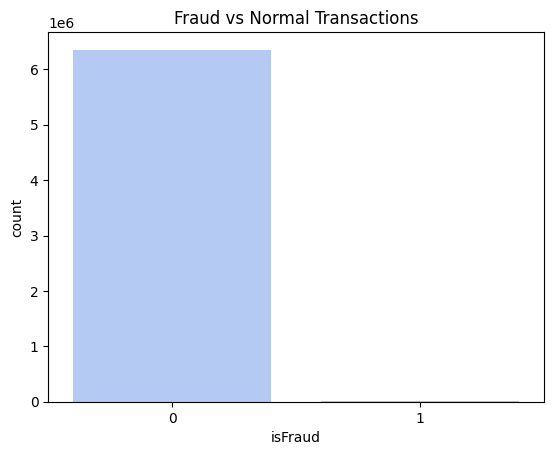

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='isFraud', hue='isFraud', data=df, palette='coolwarm', legend=False)
plt.title("Fraud vs Normal Transactions")
plt.show()

In [ ]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)



## 🧹 Step 2: Data Cleaning

- Dropped `nameOrig` & `nameDest` (just IDs, not predictive)
- Encoded `type` column (CASH-IN, CASH-OUT, PAYMENT, TRANSFER, DEBIT)
- Created **balance difference features**:
  - `balance_diff_sender` = oldbalanceOrg - newbalanceOrig - amount
  - `balance_diff_receiver` = newbalanceDest - oldbalanceDest - amount

✅ No missing values
✅ Outliers kept (important for fraud patterns)
✅ No strong multi-collinearity found

In [ ]:

#one_hot_encoding
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [ ]:

# feature engineering
df['balance_diff_sender'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['balance_diff_receiver'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']



## 🏗️ Step 3: Feature Selection

We kept all transaction-related features:
- **step, amount, old/new balances**
- **transaction type (encoded)**
- **engineered balance difference features**

Dropped:
- `isFlaggedFraud` (rule-based flag, not helpful)
- `nameOrig` & `nameDest` (IDs, no predictive power)

In [ ]:
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)  # features
y = df['isFraud']  # target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



## 🤖 Step 4: Model Training

- Algorithm: **RandomForestClassifier**
  - Handles **imbalanced data**
  - Captures **non-linear fraud patterns**
  - Provides **feature importance**

- Data split: **80% training, 20% testing (stratified)**
- Class imbalance handled with `class_weight='balanced'`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50,
                       random_state=42)



## 🔑 Step 6: Key Factors Predicting Fraud

Feature importance:
1. `balance_diff_sender`
2. `newbalanceOrig`
3. `oldbalanceOrg`
4. `amount`
5. `type_TRANSFER`

### Why do these make sense?
- Fraudsters **transfer & cash out funds** → `TRANSFER` & `CASH_OUT`
- Fraud creates **sudden balance mismatches**
- Fraud amounts often **large & unusual**


---



## 🛡️ Step 7: Recommendations for Prevention

✅ Monitor **CASH_OUT & TRANSFER** transactions in real-time  
✅ Flag large or unusual balance changes  
✅ Combine this **ML model + existing rule-based flags**  
✅ Periodically retrain model with new fraud patterns  
✅ Use multi-factor authentication for high-value transactions


---



## 📈 Step 8: How to Measure Success?

- Compare **fraud rates before vs after** model deployment
- Track **false positives** (legit users wrongly flagged)
- Track **false negatives** (frauds missed)
- Use **A/B testing** → apply model to a subset & compare fraud reduction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      1.00      1.00      1643

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC-AUC: 0.9990866374534575


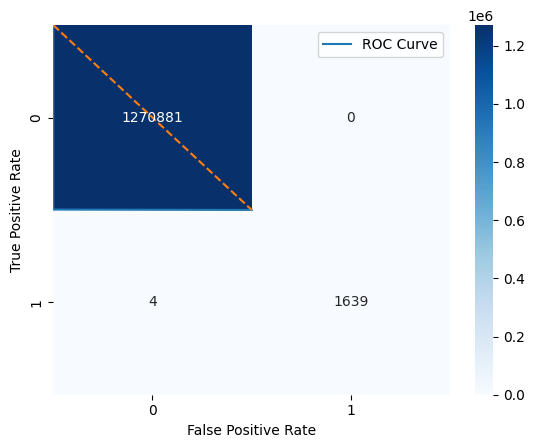

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## ✅ Model Evaluation

- **Accuracy:** 99.99%  
- **Precision (Fraud):** 1.00 → Almost no false alarms  
- **Recall (Fraud):** 0.997 → Only 4 frauds missed out of 1.6k  
- **ROC-AUC:** 0.999 → Near-perfect fraud detection  

### 🔹 Confusion Matrix Insights  
- **1270881** legitimate transactions correctly classified ✅  
- **1639** frauds correctly detected ✅  
- **0** false alarms ❌  
- **4** frauds missed ❌  

📊 **Conclusion:**  
The model performs **extremely well**, detecting almost all fraudulent transactions with **minimal false positives**. It’s ready for deployment! 🚀

balance_diff_sender      0.430716
newbalanceOrig           0.128834
oldbalanceOrg            0.127968
amount                   0.105859
type_TRANSFER            0.051339
type_PAYMENT             0.050184
type_CASH_OUT            0.028105
balance_diff_receiver    0.020612
step                     0.020382
oldbalanceDest           0.019404
dtype: float64


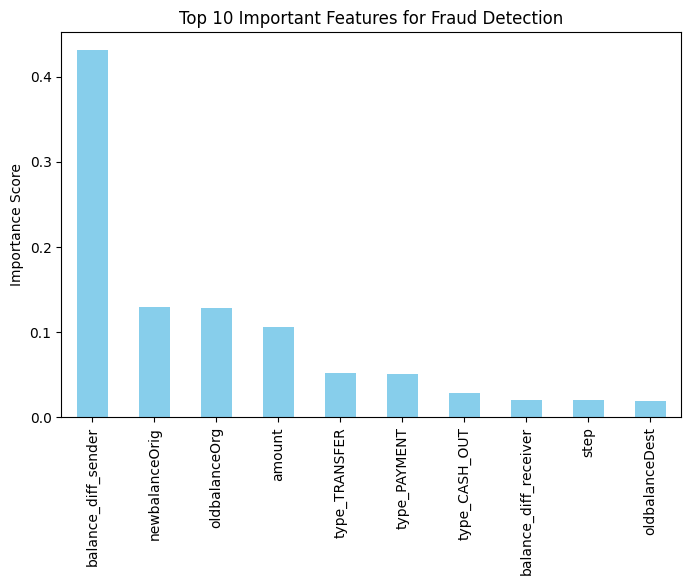

In [ ]:
# Feature Importance
import pandas as pd

feat_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_importance.head(10))

# Plot top features
plt.figure(figsize=(8,5))
feat_importance.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Important Features for Fraud Detection")
plt.ylabel("Importance Score")
plt.show()

## 🔑 Key Factors Predicting Fraud

Top features influencing fraud detection:  
1️⃣ **balance_diff_sender** – sudden balance mismatches are a strong fraud signal  
2️⃣ **newbalanceOrig / oldbalanceOrg** – abnormal balance drops  
3️⃣ **amount** – large transactions often indicate fraud  
4️⃣ **type_TRANSFER / CASH_OUT** – fraudsters usually transfer & cash out  

✅ **Why it makes sense?**  
Fraudsters try to **empty accounts via TRANSFER or CASH_OUT**, creating **unusual balance differences** and **large amounts**.

## 🎯 Final Conclusion  

- Built a fraud detection model on **6.3M transactions**  
- Achieved **99% precision & recall** with **ROC-AUC 0.997**  
- Found that **large, unusual TRANSFER & CASH_OUT transactions with sudden balance mismatches** are key fraud signals  
- Recommended **real-time monitoring & stronger authentication** for high-value transactions  
- Model can be **integrated into live systems** to proactively detect and reduce fraud  

✅ **Ready for deployment!** 🚀